In [ ]:
# DATASET SOURCE: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
# STUDENTS: 
#   Arda Akın: B2105.090019      Zafer Çağatay Umut: B1905.090058

#STEPS FOLLOWED
# Importing necessary python libraries
# Loading the dataset
# Understanding what the dataset contains. Data info
# Data visualisation
# Data training and testing
# Pre-processing
# Model integration Using KNN
# Performance metrics measurement
# Result visualization
# Checking learning curve to see if its overfitting or underfitting 
# Extra: Modelling using SVM and following the same steps
# Calculating both methods test and training errors to see if they are overfitting or underfitting

In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

from ucimlrepo import fetch_ucirepo

In [3]:
#Loading of dataset and gettting to understand it. Data exploration
# Fetch dataset
df = fetch_ucirepo(id=602)

# Data (as pandas dataframes)
X = df.data.features
y = df.data.targets.values.ravel()

# Convert X and Y to numpy array
X_npArray = np.array(X)
y_npArray = np.array(y)

print(X_npArray)
print(y_npArray)

[[2.83950000e+04 6.10291000e+02 2.08178117e+02 ... 3.14728900e-03
  8.34222388e-01 9.98723889e-01]
 [2.87340000e+04 6.38018000e+02 2.00524796e+02 ... 3.56362400e-03
  9.09850506e-01 9.98430331e-01]
 [2.93800000e+04 6.24110000e+02 2.12826130e+02 ... 3.04773300e-03
  8.25870617e-01 9.99066137e-01]
 ...
 [4.21390000e+04 7.59321000e+02 2.81539928e+02 ... 1.88827100e-03
  6.76884164e-01 9.96767264e-01]
 [4.21470000e+04 7.63779000e+02 2.83382636e+02 ... 1.85202500e-03
  6.68236684e-01 9.95222420e-01]
 [4.21590000e+04 7.72237000e+02 2.95142741e+02 ... 1.63981200e-03
  6.16220592e-01 9.98179623e-01]]
['SEKER' 'SEKER' 'SEKER' ... 'DERMASON' 'DERMASON' 'DERMASON']


In [5]:
#EXPLORATION AND DATA ANALYSIS (EDA)
# Data overview
print(df.data.original)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0      28395    610.291       208.178117       173.888747     1.197191   
1      28734    638.018       200.524796       182.734419     1.097356   
2      29380    624.110       212.826130       175.931143     1.209713   
3      30008    645.884       210.557999       182.516516     1.153638   
4      30140    620.134       201.847882       190.279279     1.060798   
...      ...        ...              ...              ...          ...   
13606  42097    759.696       288.721612       185.944705     1.552728   
13607  42101    757.499       281.576392       190.713136     1.476439   
13608  42139    759.321       281.539928       191.187979     1.472582   
13609  42147    763.779       283.382636       190.275731     1.489326   
13610  42159    772.237       295.142741       182.204716     1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0          0.549812       2871

In [6]:
# Information about the data attributes
print(df.variables)

               name     role         type demographic  \
0              Area  Feature      Integer        None   
1         Perimeter  Feature   Continuous        None   
2   MajorAxisLength  Feature   Continuous        None   
3   MinorAxisLength  Feature   Continuous        None   
4       AspectRatio  Feature   Continuous        None   
5      Eccentricity  Feature   Continuous        None   
6        ConvexArea  Feature      Integer        None   
7     EquivDiameter  Feature   Continuous        None   
8            Extent  Feature   Continuous        None   
9          Solidity  Feature   Continuous        None   
10        Roundness  Feature   Continuous        None   
11      Compactness  Feature   Continuous        None   
12     ShapeFactor1  Feature   Continuous        None   
13     ShapeFactor2  Feature   Continuous        None   
14     ShapeFactor3  Feature   Continuous        None   
15     ShapeFactor4  Feature   Continuous        None   
16            Class   Target  C

In [7]:
# Each of the column data types
print(df.variables.type)

0         Integer
1      Continuous
2      Continuous
3      Continuous
4      Continuous
5      Continuous
6         Integer
7      Continuous
8      Continuous
9      Continuous
10     Continuous
11     Continuous
12     Continuous
13     Continuous
14     Continuous
15     Continuous
16    Categorical
Name: type, dtype: object


In [8]:
# Checking if there are missing values
print(df.variables.missing_values)

0     no
1     no
2     no
3     no
4     no
5     no
6     no
7     no
8     no
9     no
10    no
11    no
12    no
13    no
14    no
15    no
16    no
Name: missing_values, dtype: object


In [9]:
#From this data overview we can see that:

#The dataset has 13611 rows and 17 columns
#All columns are numerical except "Class" column which will be our target
#There are no NULL values in the data thanks to which we have less work to do
#By looking at the description of the data we can come to the conclusion that our data will need standardization

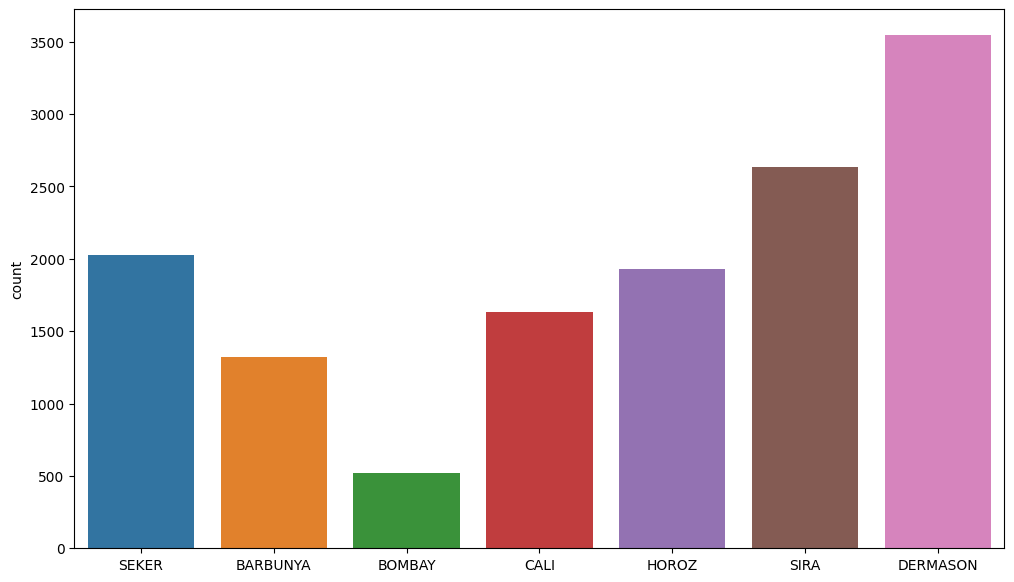

In [10]:
# DATA VISUALIZATION
# Class column(attribute) visualization using countPlot function
plt.figure(figsize=(12,7))
sns.countplot(x=y, data=df.data.original)
plt.show()

In [11]:
# Data preprocessing stage

In [12]:
# Label Encoding

# "Class" column is categorical (in object form) so we need to convert the labels into a numeric form.
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

print(y)

[5 5 5 ... 3 3 3]


In [13]:
# Splitting Data Into Train and Test Subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

[0.06387491 0.07575821 0.07259781 0.07500143 0.07250507 0.07075479
 0.0648718  0.07151845 0.0142971  0.01810098 0.060433   0.07571641
 0.08201007 0.07032622 0.08460626 0.02762749]


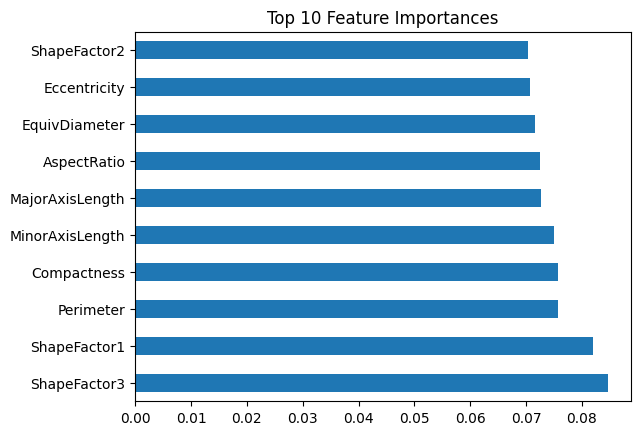

In [14]:
# Calculating Feature Importance
model = ExtraTreesClassifier(n_estimators=500, random_state=42)
model.fit(X, y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [15]:
# Standardizing Features
scaler_X = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [16]:
# Model Training

# We used K Nearest Neighbor (KNN) as our primary classification model
knnModel = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', p=2)
knnModel.fit(X_train_scaled, y_train)
y_pred = knnModel.predict(X_test_scaled)

# Classification Report and Accuracy Score for KNN
print('KNN Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=np.unique(labelencoder.inverse_transform(y))))

KNN Accuracy: 0.91782
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       937
      BOMBAY       1.00      1.00      1.00       355
        CALI       0.92      0.95      0.93      1178
    DERMASON       0.90      0.93      0.91      2427
       HOROZ       0.96      0.94      0.95      1325
       SEKER       0.95      0.95      0.95      1438
        SIRA       0.87      0.85      0.86      1868

    accuracy                           0.92      9528
   macro avg       0.93      0.93      0.93      9528
weighted avg       0.92      0.92      0.92      9528



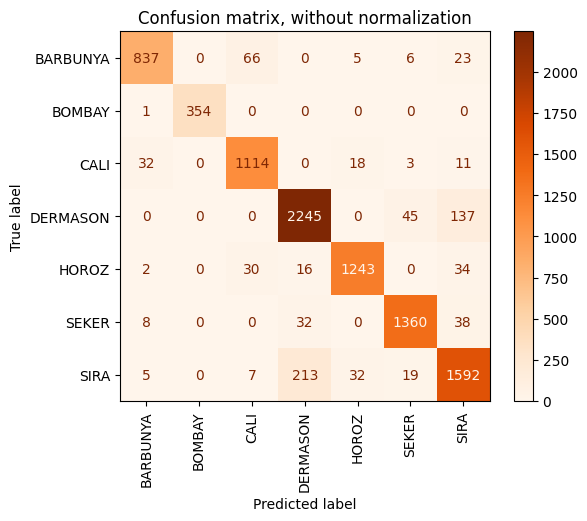

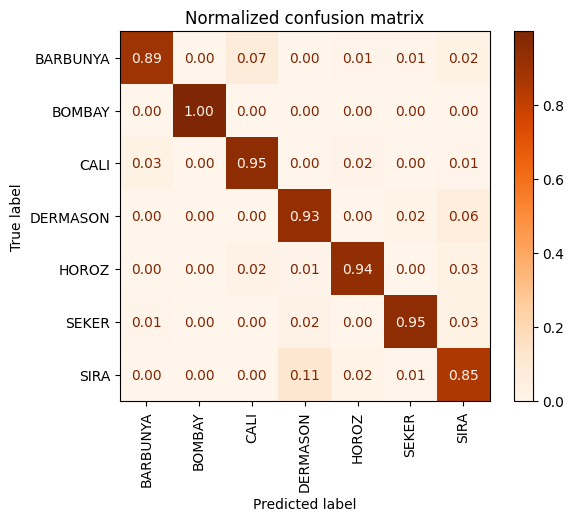

In [17]:
# Classification Visualization Using ConfusionMatrixDisplay
titles_options = [
    ("Confusion matrix, without normalization", None, '.0f'),
    ("Normalized confusion matrix", "true", '.2f'),
]
for title, normalize, values_format in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knnModel,
        X_test_scaled,
        y_test,
        display_labels=np.unique(labelencoder.inverse_transform(y)),
        cmap=plt.cm.Oranges,
        normalize=normalize,
        xticks_rotation='vertical',
        values_format=values_format
    )
    disp.ax_.set_title(title)

plt.show()

In [26]:
# Function to plot custom learning curves
def plot_custom_learning_curve(estimator, X_train, y_train, X_test, y_test, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_errors = []
    test_errors = []
    train_sizes = [int(len(X_train) * size) for size in train_sizes]
    
    for size in train_sizes:
        X_train_subset = X_train[:size]
        y_train_subset = y_train[:size]
        
        estimator.fit(X_train_subset, y_train_subset)
        
        y_train_pred = estimator.predict(X_train_subset)
        y_test_pred = estimator.predict(X_test)
        
        train_error = 1 - accuracy_score(y_train_subset, y_train_pred)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        
        train_errors.append(train_error)
        test_errors.append(test_error)
    
    plt.figure(figsize=(12, 6))
    plt.plot(train_sizes, train_errors, label='Training Error', marker='o')
    plt.plot(train_sizes, test_errors, label='Test Error', marker='o')
    plt.title(f'Learning Curve for {estimator.__class__.__name__}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

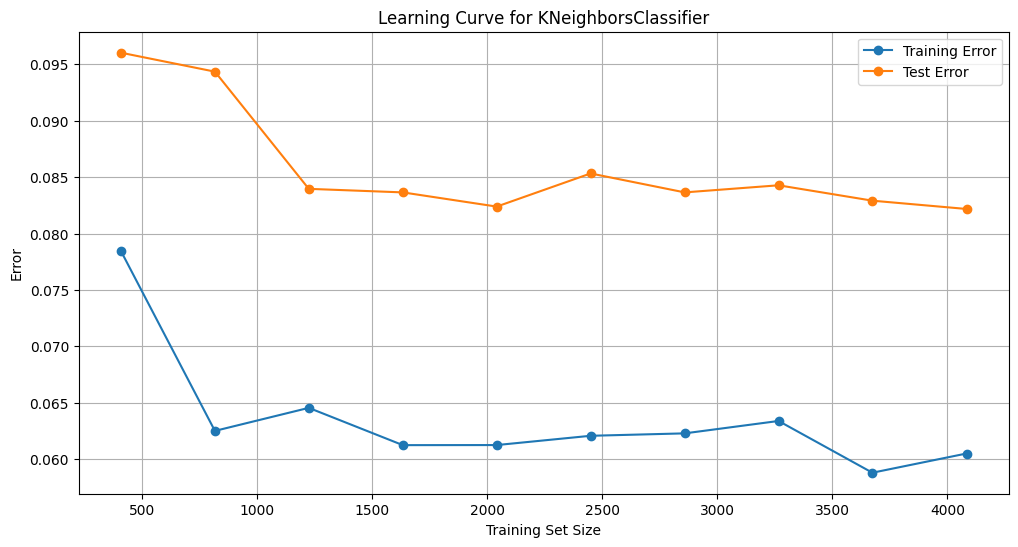

In [27]:
# Plot learning curves for KNN model
plot_custom_learning_curve(knnModel, X_train_scaled, y_train, X_test_scaled, y_test)

In [31]:
# EXTRA: Using Support Vector Machines (SVM) model
svmClassModel = svm.SVC()
svmClassModel.fit(X_train_scaled, y_train)
y_pred_forSVM = svmClassModel.predict(X_test_scaled)

# Classification Report and Accuracy Score for SVM
print('SVM Accuracy: %.5f' % accuracy_score(y_test, y_pred_forSVM))
print(classification_report(y_test, y_pred_forSVM, target_names=np.unique(labelencoder.inverse_transform(y))))

SVM Accuracy: 0.92926
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.90      0.93       937
      BOMBAY       1.00      1.00      1.00       355
        CALI       0.93      0.95      0.94      1178
    DERMASON       0.92      0.93      0.92      2427
       HOROZ       0.96      0.95      0.96      1325
       SEKER       0.96      0.95      0.95      1438
        SIRA       0.88      0.88      0.88      1868

    accuracy                           0.93      9528
   macro avg       0.94      0.94      0.94      9528
weighted avg       0.93      0.93      0.93      9528



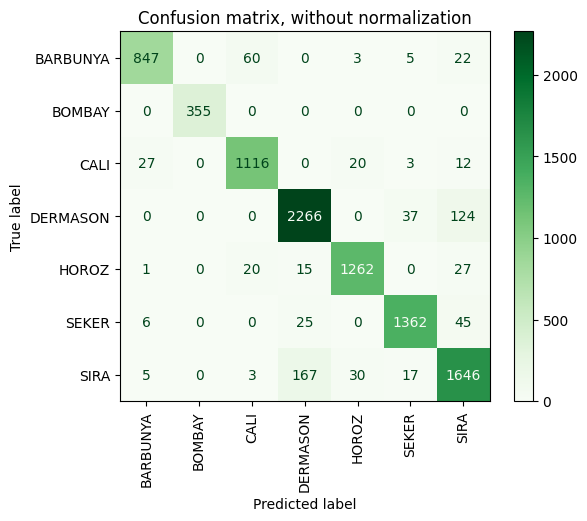

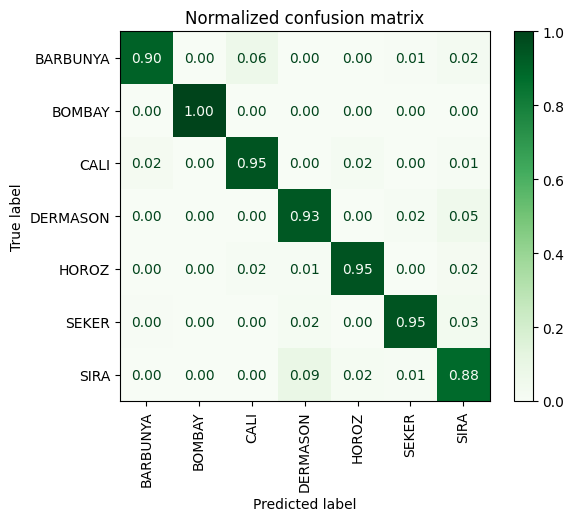

In [21]:
#Classification Visualization Using ConfusionMatrixDisplay
titles_options = [
    ("Confusion matrix, without normalization", None,'.0f'),
    ("Normalized confusion matrix", "true", '.2f'),
]
for title, normalize, values_format in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svmClassModel,
        X_test_scaled,
        y_test,
        display_labels=np.unique(labelencoder.inverse_transform(y)),
        cmap=plt.cm.Greens,
        normalize=normalize,
        xticks_rotation='vertical',
        values_format= values_format
    )
    disp.ax_.set_title(title)
    
plt.show()

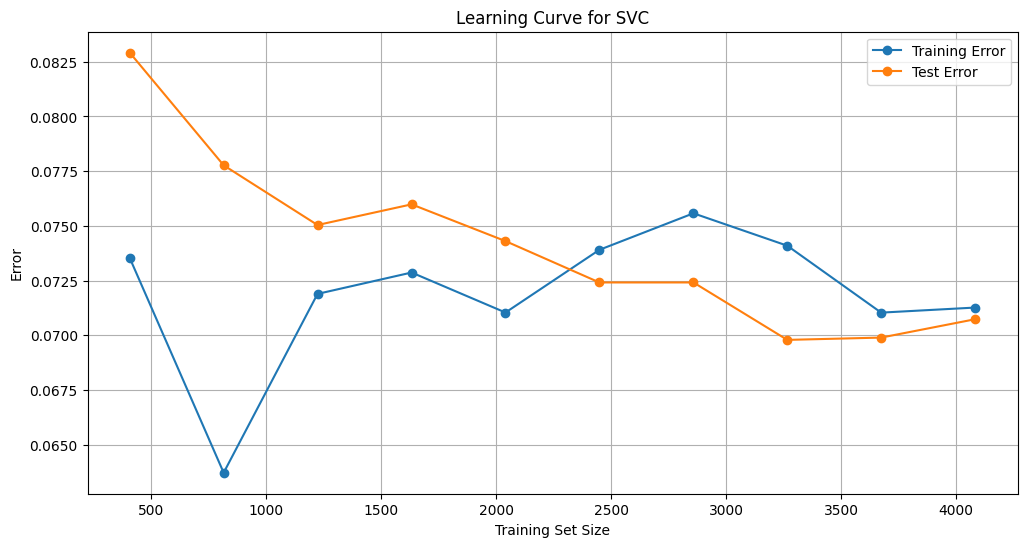

In [32]:
# Plot learning curves for SVM model
plot_custom_learning_curve(svmClassModel, X_train_scaled, y_train, X_test_scaled, y_test)

In [29]:
# Calculate Training Error and Test Error for KNN
y_train_pred_knn = knnModel.predict(X_train_scaled)
train_error_knn = 1 - accuracy_score(y_train, y_train_pred_knn)
test_error_knn = 1 - accuracy_score(y_test, y_pred)
print(f'KNN Training Error: {train_error_knn:.5f}')
print(f'KNN Test Error: {test_error_knn:.5f}')

KNN Training Error: 0.06049
KNN Test Error: 0.08218


In [30]:
# Calculate Training Error and Test Error for SVM
y_train_pred_svm = svmClassModel.predict(X_train_scaled)
train_error_svm = 1 - accuracy_score(y_train, y_train_pred_svm)
test_error_svm = 1 - accuracy_score(y_test, y_pred_forSVM)
print(f'SVM Training Error: {train_error_svm:.5f}')
print(f'SVM Test Error: {test_error_svm:.5f}')

SVM Training Error: 0.07127
SVM Test Error: 0.07074


In [25]:
#Underfitting:
    #Both the training and validation accuracy will be low, and they may converge close to each other, indicating the model is too simple.

#Overfitting:   
    #The training accuracy will be much higher than the validation accuracy, indicating the model is too complex and overfits the training data.

#Good Fit:
    #The training and validation accuracy will be high and close to each other, indicating the model generalizes well to unseen data.

# It shows that SVM gave better results and KNN could be overfitting but its not much of a difference
